In [1]:
import MCTS
import numpy as np
from shared import *
from treeSearch import *
import seaborn as sns
from matplotlib import pyplot as plt
import itertools
from board_gen import *
import pandas as pd
from utils import *
sns.set_context('talk')
np.random.seed(100)

%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
stratL = ['loose_end','join','outer','middle']
n_runs=20
n_tasks=12
max_iters=5000
niter=np.zeros((len(stratL),n_runs,n_tasks,2))

In [3]:
def run2taskL(taskL,nitr=50):
    ntasks = len(taskL)
    rt = np.zeros([nitr,4,ntasks])
    smode = np.zeros([nitr,4,ntasks])
    for itr in range(nitr):
        for idx,(mem,bfs) in enumerate(itertools.product([False,True],[True,False])):
            D = treeSearch(taskL,BFS=bfs,memory_flag=mem)
            rt[itr,idx],smode[itr,idx] = D['rt'],D['smode']
    return rt,smode
idxL = ['BFS','DFS','BFSm','DFSm']

In [4]:
res=[]
for strat_id,strat_name in enumerate(stratL):
    for run_id in range(n_runs):
        taskL = []#[generate_board(tactic_name=strat_name,n_extra_sticks=0,contiguous=True) for i in range(1)]
        taskL+=[generate_board(tactic_name=strat_name,n_extra_sticks=3,contiguous=True) for i in range(n_tasks)]
        for use_mem in [0,1]:
            memory=[]
            for task_id,task in enumerate(taskL):
                hn=task.head_node
                t2=MCTS.MCTSTask(hn.obs,task.nsquares,hn.moves_remain,memory=memory)
                n_iters=MCTS.MCTS(t2,max_iters=max_iters)
                if n_iters==-99:
                    n_iters=max_iters
                if use_mem==1:
                    MCTS.update_memory(t2,memory,gamma=1)
                res.append([strat_id,run_id,task_id,use_mem,n_iters,'mcts'])
                print(res[-1])
                
res=pd.DataFrame(res,columns=['strat','run_id','task_id','mem','rt','alg'])
                

[0, 0, 0, 0, 416, 'mcts']
[0, 0, 1, 0, 350, 'mcts']
[0, 0, 2, 0, 516, 'mcts']
[0, 0, 3, 0, 286, 'mcts']
[0, 0, 4, 0, 322, 'mcts']
[0, 0, 5, 0, 343, 'mcts']
[0, 0, 6, 0, 1044, 'mcts']
[0, 0, 7, 0, 232, 'mcts']
[0, 0, 8, 0, 403, 'mcts']
[0, 0, 9, 0, 481, 'mcts']
[0, 0, 10, 0, 421, 'mcts']
[0, 0, 11, 0, 430, 'mcts']
[0, 0, 0, 1, 428, 'mcts']
[0, 0, 1, 1, 345, 'mcts']
[0, 0, 2, 1, 411, 'mcts']
[0, 0, 3, 1, 197, 'mcts']
[0, 0, 4, 1, 349, 'mcts']
[0, 0, 5, 1, 213, 'mcts']
[0, 0, 6, 1, 1, 'mcts']
[0, 0, 7, 1, 393, 'mcts']
[0, 0, 8, 1, 1, 'mcts']
[0, 0, 9, 1, 287, 'mcts']
[0, 0, 10, 1, 244, 'mcts']
[0, 0, 11, 1, 504, 'mcts']
[0, 1, 0, 0, 245, 'mcts']
[0, 1, 1, 0, 219, 'mcts']
[0, 1, 2, 0, 363, 'mcts']
[0, 1, 3, 0, 367, 'mcts']
[0, 1, 4, 0, 255, 'mcts']
[0, 1, 5, 0, 265, 'mcts']
[0, 1, 6, 0, 227, 'mcts']
[0, 1, 7, 0, 483, 'mcts']
[0, 1, 8, 0, 259, 'mcts']
[0, 1, 9, 0, 233, 'mcts']
[0, 1, 10, 0, 204, 'mcts']
[0, 1, 11, 0, 337, 'mcts']
[0, 1, 0, 1, 349, 'mcts']
[0, 1, 1, 1, 192, 'mcts']
[0, 1, 2,

[0, 13, 3, 0, 334, 'mcts']
[0, 13, 4, 0, 349, 'mcts']
[0, 13, 5, 0, 374, 'mcts']
[0, 13, 6, 0, 344, 'mcts']
[0, 13, 7, 0, 398, 'mcts']
[0, 13, 8, 0, 485, 'mcts']
[0, 13, 9, 0, 430, 'mcts']
[0, 13, 10, 0, 218, 'mcts']
[0, 13, 11, 0, 269, 'mcts']
[0, 13, 0, 1, 389, 'mcts']
[0, 13, 1, 1, 448, 'mcts']
[0, 13, 2, 1, 709, 'mcts']
[0, 13, 3, 1, 207, 'mcts']
[0, 13, 4, 1, 1, 'mcts']
[0, 13, 5, 1, 1, 'mcts']
[0, 13, 6, 1, 231, 'mcts']
[0, 13, 7, 1, 1, 'mcts']
[0, 13, 8, 1, 1, 'mcts']
[0, 13, 9, 1, 347, 'mcts']
[0, 13, 10, 1, 285, 'mcts']
[0, 13, 11, 1, 1, 'mcts']
[0, 14, 0, 0, 663, 'mcts']
[0, 14, 1, 0, 381, 'mcts']
[0, 14, 2, 0, 286, 'mcts']
[0, 14, 3, 0, 383, 'mcts']
[0, 14, 4, 0, 759, 'mcts']
[0, 14, 5, 0, 463, 'mcts']
[0, 14, 6, 0, 397, 'mcts']
[0, 14, 7, 0, 278, 'mcts']
[0, 14, 8, 0, 174, 'mcts']
[0, 14, 9, 0, 257, 'mcts']
[0, 14, 10, 0, 337, 'mcts']
[0, 14, 11, 0, 395, 'mcts']
[0, 14, 0, 1, 445, 'mcts']
[0, 14, 1, 1, 540, 'mcts']
[0, 14, 2, 1, 432, 'mcts']
[0, 14, 3, 1, 1, 'mcts']
[0, 14,

[1, 6, 0, 0, 1563, 'mcts']
[1, 6, 1, 0, 1264, 'mcts']
[1, 6, 2, 0, 638, 'mcts']
[1, 6, 3, 0, 1477, 'mcts']
[1, 6, 4, 0, 1253, 'mcts']
[1, 6, 5, 0, 1914, 'mcts']
[1, 6, 6, 0, 2113, 'mcts']
[1, 6, 7, 0, 422, 'mcts']
[1, 6, 8, 0, 904, 'mcts']
[1, 6, 9, 0, 2117, 'mcts']
[1, 6, 10, 0, 1512, 'mcts']
[1, 6, 11, 0, 1967, 'mcts']
[1, 6, 0, 1, 1607, 'mcts']
[1, 6, 1, 1, 659, 'mcts']
[1, 6, 2, 1, 1, 'mcts']
[1, 6, 3, 1, 1761, 'mcts']
[1, 6, 4, 1, 1, 'mcts']
[1, 6, 5, 1, 4987, 'mcts']
[1, 6, 6, 1, 2227, 'mcts']
[1, 6, 7, 1, 481, 'mcts']
[1, 6, 8, 1, 1, 'mcts']
[1, 6, 9, 1, 1292, 'mcts']
[1, 6, 10, 1, 1127, 'mcts']
[1, 6, 11, 1, 1, 'mcts']
[1, 7, 0, 0, 1464, 'mcts']
[1, 7, 1, 0, 832, 'mcts']
[1, 7, 2, 0, 1627, 'mcts']
[1, 7, 3, 0, 2323, 'mcts']
[1, 7, 4, 0, 2286, 'mcts']
[1, 7, 5, 0, 1497, 'mcts']
[1, 7, 6, 0, 913, 'mcts']
[1, 7, 7, 0, 586, 'mcts']
[1, 7, 8, 0, 1535, 'mcts']
[1, 7, 9, 0, 1215, 'mcts']
[1, 7, 10, 0, 1028, 'mcts']
[1, 7, 11, 0, 737, 'mcts']
[1, 7, 0, 1, 993, 'mcts']
[1, 7, 1, 1, 572,

[1, 18, 3, 1, 1521, 'mcts']
[1, 18, 4, 1, 1853, 'mcts']
[1, 18, 5, 1, 1965, 'mcts']
[1, 18, 6, 1, 2780, 'mcts']
[1, 18, 7, 1, 1, 'mcts']
[1, 18, 8, 1, 1, 'mcts']
[1, 18, 9, 1, 1303, 'mcts']
[1, 18, 10, 1, 1, 'mcts']
[1, 18, 11, 1, 1, 'mcts']
[1, 19, 0, 0, 473, 'mcts']
[1, 19, 1, 0, 1362, 'mcts']
[1, 19, 2, 0, 1188, 'mcts']
[1, 19, 3, 0, 1348, 'mcts']
[1, 19, 4, 0, 1158, 'mcts']
[1, 19, 5, 0, 1970, 'mcts']
[1, 19, 6, 0, 2303, 'mcts']
[1, 19, 7, 0, 1783, 'mcts']
[1, 19, 8, 0, 1092, 'mcts']
[1, 19, 9, 0, 4639, 'mcts']
[1, 19, 10, 0, 852, 'mcts']
[1, 19, 11, 0, 1616, 'mcts']
[1, 19, 0, 1, 905, 'mcts']
[1, 19, 1, 1, 1421, 'mcts']
[1, 19, 2, 1, 1093, 'mcts']
[1, 19, 3, 1, 1, 'mcts']
[1, 19, 4, 1, 1386, 'mcts']
[1, 19, 5, 1, 1, 'mcts']
[1, 19, 6, 1, 689, 'mcts']
[1, 19, 7, 1, 1, 'mcts']
[1, 19, 8, 1, 1, 'mcts']
[1, 19, 9, 1, 1826, 'mcts']
[1, 19, 10, 1, 1, 'mcts']
[1, 19, 11, 1, 1, 'mcts']
[2, 0, 0, 0, 876, 'mcts']
[2, 0, 1, 0, 932, 'mcts']
[2, 0, 2, 0, 1048, 'mcts']
[2, 0, 3, 0, 974, 'mcts']

[2, 11, 4, 1, 1272, 'mcts']
[2, 11, 5, 1, 1, 'mcts']
[2, 11, 6, 1, 1, 'mcts']
[2, 11, 7, 1, 1, 'mcts']
[2, 11, 8, 1, 1, 'mcts']
[2, 11, 9, 1, 1, 'mcts']
[2, 11, 10, 1, 622, 'mcts']
[2, 11, 11, 1, 1, 'mcts']
[2, 12, 0, 0, 746, 'mcts']
[2, 12, 1, 0, 867, 'mcts']
[2, 12, 2, 0, 806, 'mcts']
[2, 12, 3, 0, 1121, 'mcts']
[2, 12, 4, 0, 1090, 'mcts']
[2, 12, 5, 0, 666, 'mcts']
[2, 12, 6, 0, 1230, 'mcts']
[2, 12, 7, 0, 896, 'mcts']
[2, 12, 8, 0, 836, 'mcts']
[2, 12, 9, 0, 930, 'mcts']
[2, 12, 10, 0, 1026, 'mcts']
[2, 12, 11, 0, 1095, 'mcts']
[2, 12, 0, 1, 736, 'mcts']
[2, 12, 1, 1, 1, 'mcts']
[2, 12, 2, 1, 898, 'mcts']
[2, 12, 3, 1, 1349, 'mcts']
[2, 12, 4, 1, 1, 'mcts']
[2, 12, 5, 1, 1123, 'mcts']
[2, 12, 6, 1, 1, 'mcts']
[2, 12, 7, 1, 1, 'mcts']
[2, 12, 8, 1, 1, 'mcts']
[2, 12, 9, 1, 693, 'mcts']
[2, 12, 10, 1, 1, 'mcts']
[2, 12, 11, 1, 1, 'mcts']
[2, 13, 0, 0, 905, 'mcts']
[2, 13, 1, 0, 655, 'mcts']
[2, 13, 2, 0, 1147, 'mcts']
[2, 13, 3, 0, 1204, 'mcts']
[2, 13, 4, 0, 869, 'mcts']
[2, 13, 5, 

[3, 4, 4, 1, 1065, 'mcts']
[3, 4, 5, 1, 1, 'mcts']
[3, 4, 6, 1, 405, 'mcts']
[3, 4, 7, 1, 1, 'mcts']
[3, 4, 8, 1, 1, 'mcts']
[3, 4, 9, 1, 1, 'mcts']
[3, 4, 10, 1, 1, 'mcts']
[3, 4, 11, 1, 1, 'mcts']
[3, 5, 0, 0, 789, 'mcts']
[3, 5, 1, 0, 937, 'mcts']
[3, 5, 2, 0, 689, 'mcts']
[3, 5, 3, 0, 329, 'mcts']
[3, 5, 4, 0, 604, 'mcts']
[3, 5, 5, 0, 508, 'mcts']
[3, 5, 6, 0, 938, 'mcts']
[3, 5, 7, 0, 417, 'mcts']
[3, 5, 8, 0, 468, 'mcts']
[3, 5, 9, 0, 560, 'mcts']
[3, 5, 10, 0, 852, 'mcts']
[3, 5, 11, 0, 1008, 'mcts']
[3, 5, 0, 1, 873, 'mcts']
[3, 5, 1, 1, 1, 'mcts']
[3, 5, 2, 1, 521, 'mcts']
[3, 5, 3, 1, 1, 'mcts']
[3, 5, 4, 1, 1019, 'mcts']
[3, 5, 5, 1, 1, 'mcts']
[3, 5, 6, 1, 1, 'mcts']
[3, 5, 7, 1, 1, 'mcts']
[3, 5, 8, 1, 1, 'mcts']
[3, 5, 9, 1, 361, 'mcts']
[3, 5, 10, 1, 1, 'mcts']
[3, 5, 11, 1, 1, 'mcts']
[3, 6, 0, 0, 401, 'mcts']
[3, 6, 1, 0, 396, 'mcts']
[3, 6, 2, 0, 798, 'mcts']
[3, 6, 3, 0, 536, 'mcts']
[3, 6, 4, 0, 433, 'mcts']
[3, 6, 5, 0, 610, 'mcts']
[3, 6, 6, 0, 450, 'mcts']
[3, 6

[3, 17, 6, 1, 369, 'mcts']
[3, 17, 7, 1, 1, 'mcts']
[3, 17, 8, 1, 1, 'mcts']
[3, 17, 9, 1, 1, 'mcts']
[3, 17, 10, 1, 1, 'mcts']
[3, 17, 11, 1, 1, 'mcts']
[3, 18, 0, 0, 555, 'mcts']
[3, 18, 1, 0, 527, 'mcts']
[3, 18, 2, 0, 395, 'mcts']
[3, 18, 3, 0, 716, 'mcts']
[3, 18, 4, 0, 536, 'mcts']
[3, 18, 5, 0, 1020, 'mcts']
[3, 18, 6, 0, 327, 'mcts']
[3, 18, 7, 0, 860, 'mcts']
[3, 18, 8, 0, 716, 'mcts']
[3, 18, 9, 0, 916, 'mcts']
[3, 18, 10, 0, 665, 'mcts']
[3, 18, 11, 0, 796, 'mcts']
[3, 18, 0, 1, 449, 'mcts']
[3, 18, 1, 1, 330, 'mcts']
[3, 18, 2, 1, 1, 'mcts']
[3, 18, 3, 1, 1117, 'mcts']
[3, 18, 4, 1, 1, 'mcts']
[3, 18, 5, 1, 1055, 'mcts']
[3, 18, 6, 1, 1, 'mcts']
[3, 18, 7, 1, 1, 'mcts']
[3, 18, 8, 1, 1, 'mcts']
[3, 18, 9, 1, 1, 'mcts']
[3, 18, 10, 1, 1, 'mcts']
[3, 18, 11, 1, 524, 'mcts']
[3, 19, 0, 0, 565, 'mcts']
[3, 19, 1, 0, 905, 'mcts']
[3, 19, 2, 0, 904, 'mcts']
[3, 19, 3, 0, 484, 'mcts']
[3, 19, 4, 0, 554, 'mcts']
[3, 19, 5, 0, 860, 'mcts']
[3, 19, 6, 0, 826, 'mcts']
[3, 19, 7, 0, 49

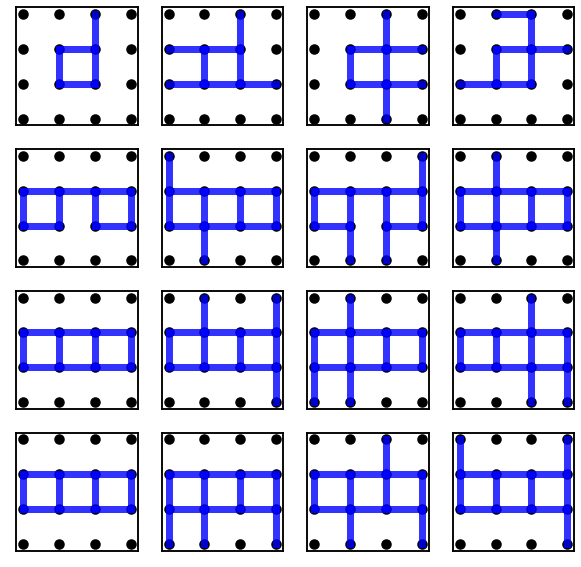

In [5]:
#sequence of boards for illustration
boards_per_row=4
f,ax = plt.subplots(len(stratL),boards_per_row,figsize=(10,10))


for strat_id,strat_name in enumerate(stratL):
    taskL=[generate_board(tactic_name=strat_name,n_extra_sticks=0,contiguous=True)]
    taskL+=[generate_board(tactic_name=strat_name,n_extra_sticks=3,contiguous=True) for i in range(boards_per_row-1)]
    for board_id in range(boards_per_row):
        draw_board(ax[strat_id,board_id],taskL[board_id].head_node.obs,c='blue',linewidth=7,alpha=.8)
        ax[strat_id,board_id].set_xticks([])
        ax[strat_id,board_id].set_yticks([])

        

In [6]:
res['strat']

0       0
1       0
2       0
3       0
4       0
       ..
1915    3
1916    3
1917    3
1918    3
1919    3
Name: strat, Length: 1920, dtype: int64

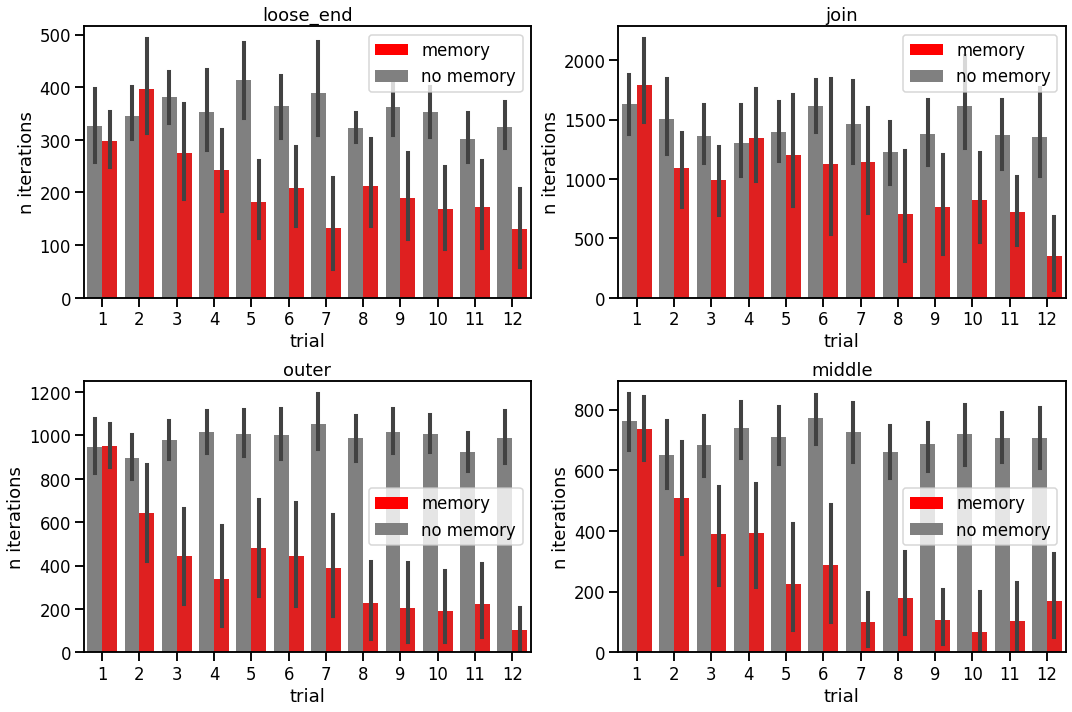

In [27]:
from matplotlib.patches import Patch
plt.figure(figsize=(15,10))
for strat_id,strat_name in enumerate(stratL):
    plt.subplot(2,2,strat_id+1)
    ids=res['strat']==strat_id
    sns.barplot(x='task_id',y='rt',hue='mem',data=res[ids],palette={0:'gray',1:'red'})
    plt.title(strat_name)
    #plt.ylim(0,10)
    plt.xlabel('trial')
    plt.ylabel('n iterations')
    plt.legend('')
    hand=[
    Patch(facecolor='red',label='memory'),
    Patch(facecolor='gray', label='no memory')
    ]
    plt.legend(handles=hand)
    plt.xticks(np.arange(n_tasks),np.arange(n_tasks)+1)
plt.tight_layout()
